# 입문자를 위한, 파이썬/R 데이터 분석

## Part(2) - Day12  : 

]

## Today's mission

- [ 회귀분석 ] : 머신러닝 데이터 분석 예제 실습
1. 단순회귀분석
2. 다항회귀분석
3. 다중회귀분석

]

# [ 회귀분석 ]

## 1. 단순회귀분석

In [1]:
# -*- coding: utf-8 -*-
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('data/auto-mpg.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

속성 정보 :

1. mpg : 연속
2. 실린더 : 다중 값 이산
3. 변위 : 연속
4. 마력 : 연속
5. 무게 : 연속
6. 가속 : 연속
7. 모델 연도 : 다중 값 이산
8. 원점 : 다중 값 이산
9. 자동차 이름 : 문자열 (각 인스턴스에 대해 고유함)

In [4]:
# 데이터 살펴보기
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 50)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [6]:
'''
[Step 2] 데이터 탐색
'''
# 데이터 자료형 확인
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
# 데이터 통계 요약정보 확인
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].unique()          # horsepower 열의 고유값 확인

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경

In [72]:
# pd.set_option('display.max_rows', 500)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [11]:
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

In [12]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [13]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


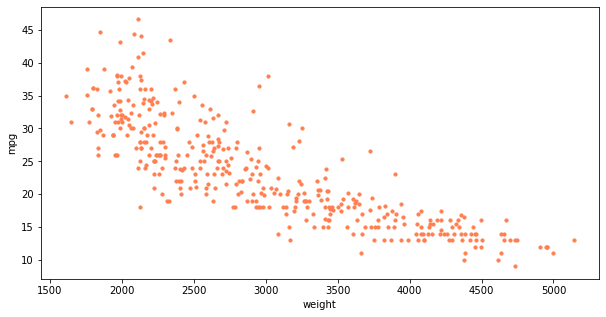

In [14]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

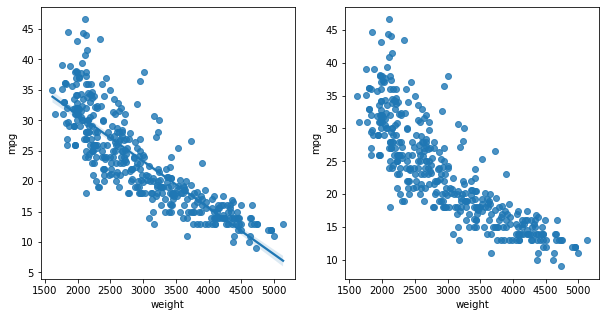

In [15]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

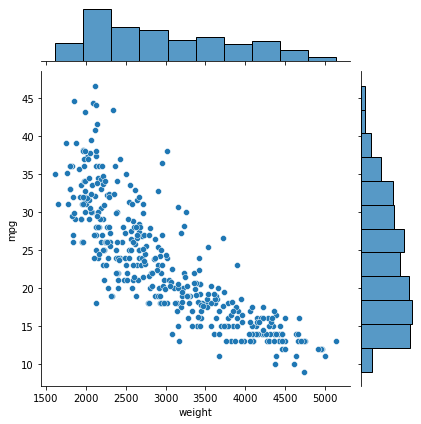

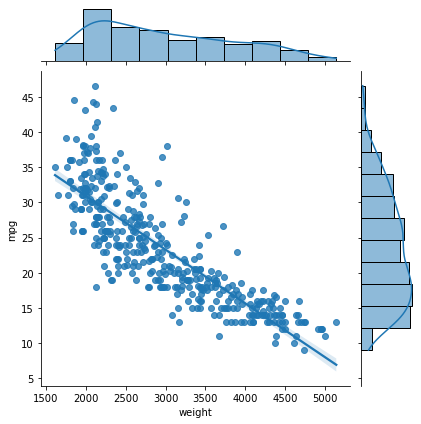

In [16]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

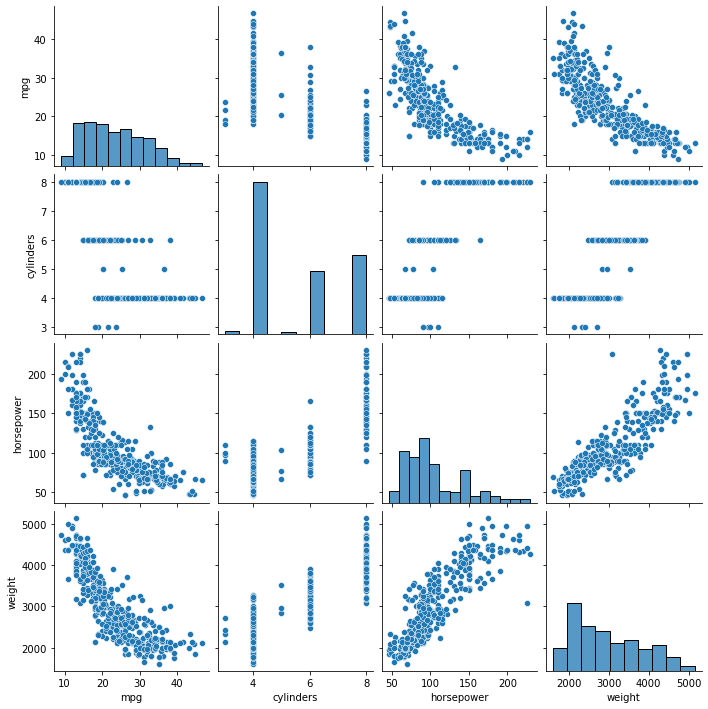

In [17]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()

In [18]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/검증용(test data)
'''
# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

In [19]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

In [20]:
print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


In [21]:
'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
lr

LinearRegression()

In [23]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

0.6822458558299322




In [24]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

기울기 a:  [-0.00775343]




In [25]:
# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')

y절편 b 46.7103662572801




/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


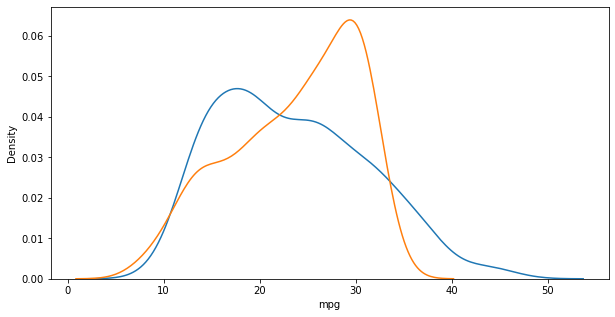

In [28]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y") # 정답 : 파란색
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1) # 예측값 : 주황색
plt.show()
plt.close()

In [29]:
# 정답
list(y[0:10])

[18.0, 15.0, 18.0, 16.0, 17.0, 15.0, 14.0, 14.0, 14.0, 15.0]

In [32]:
# 예측값
y_hat[0:10]

array([19.54234168, 18.0769431 , 20.06957503, 20.09283533, 19.96878042,
       13.05271937, 12.95192476, 13.27756889, 12.40143111, 16.85965432])

## 2. 다항회귀분석

In [33]:
# -*- coding: utf-8 -*-
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
'''
[Step 1 ~ 4] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

In [35]:
# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['horsepower']]  #독립 변수 X
y=ndf['mpg']           #종속 변수 Y

In [36]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


In [37]:
'''
Step 5: 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)




In [39]:
X_train.head()

,horsepower
38,165.0
172,71.0
277,133.0
196,60.0
357,100.0


In [44]:
X_train_poly[:5]

array([[1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 7.1000e+01, 5.0410e+03],
       [1.0000e+00, 1.3300e+02, 1.7689e+04],
       [1.0000e+00, 6.0000e+01, 3.6000e+03],
       [1.0000e+00, 1.0000e+02, 1.0000e+04]])

In [45]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

LinearRegression()

In [46]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')

0.7066920352416861




In [47]:
# 회귀식의 기울기
print('기울기 a: ', pr.coef_)
print('\n')

기울기 a:  [ 0.         -0.44239775  0.00113262]




In [48]:
# 회귀식의 y절편
print('y절편 b', pr.intercept_)
print('\n')

y절편 b 55.99491066376761




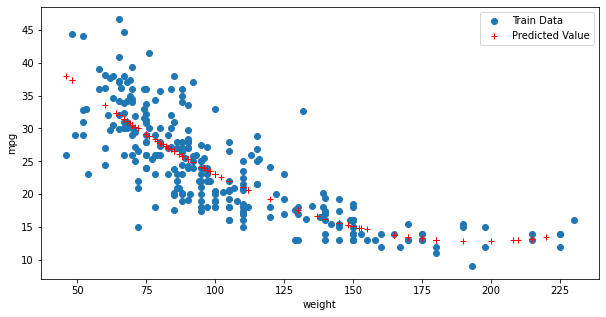

In [49]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train.values, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test.values, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


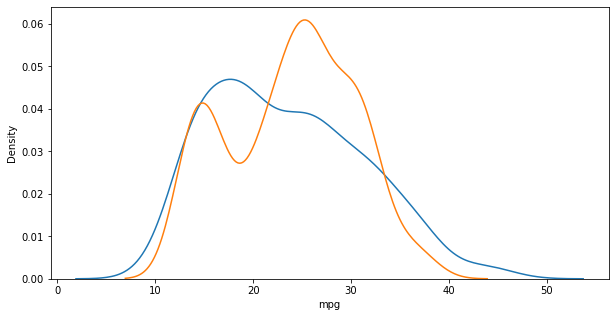

In [52]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")                 # 정답 : 파란색
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1) # 예측 : 주황색
plt.show()
plt.close()

## 3. 다중회귀분석


In [53]:
# -*- coding: utf-8 -*-
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
'''
[Step 1 ~ 3] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg','displacement','horsepower','weight']]
#ndf = df[['mpg','displacement','horsepower','weight', 'origin']]

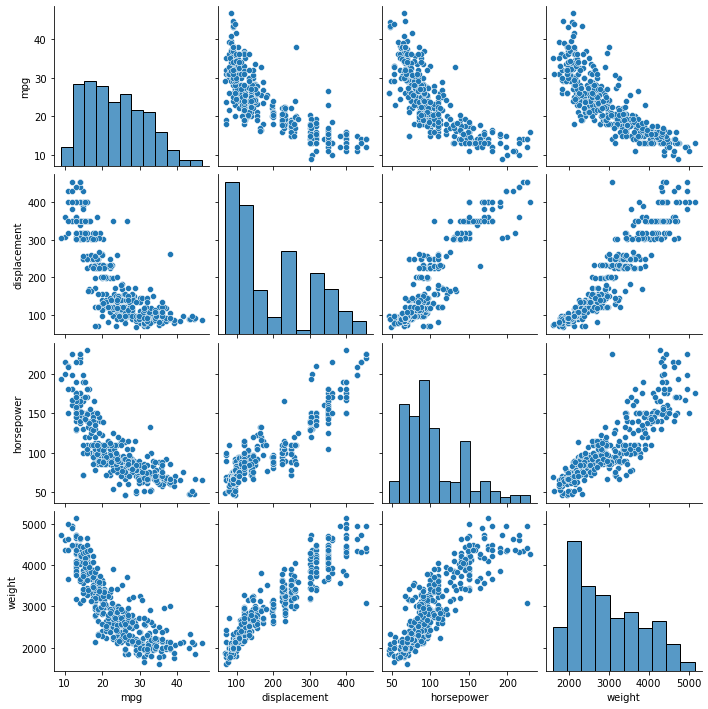

In [55]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
# plt.show()
# plt.close()

In [56]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['displacement','horsepower','weight']]  #독립 변수 X1, X2, X3
#X=ndf[['displacement','horsepower','weight', 'origin']]  #독립 변수 X1, X2, X3
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape) 

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [57]:
'''
Step 5: 다중회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)

0.6993315144604407


In [59]:
X_train.head()

,displacement,horsepower,weight
38,350.0,165.0,4209.0
172,90.0,71.0,2223.0
277,163.0,133.0,3410.0
196,98.0,60.0,2164.0
357,119.0,100.0,2615.0


In [60]:
lr

LinearRegression()

In [61]:
# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)

X 변수의 계수 a:  [-0.00291301 -0.04314877 -0.00574424]


In [62]:
# 회귀식의 y절편
print('상수항 b', lr.intercept_)

상수항 b 45.83547601109956


/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/shinminseog/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


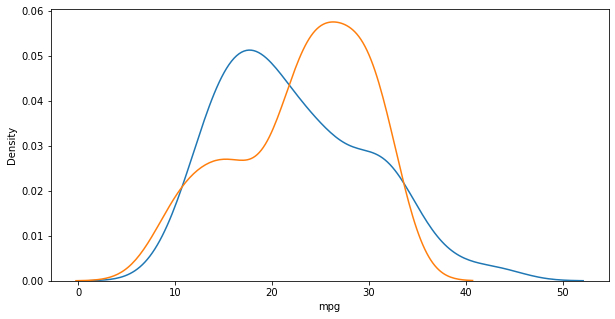

In [63]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")          # 정답 : 파란색
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)    # 예측 : 주황색
plt.show()
plt.close()

## 1) 실습

In [ ]:
pd.set_option('display.max_rows', 60)

In [ ]:
'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경

df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

속성 정보 :

1. mpg : 연속
2. 실린더 : 다중 값 이산
3. 변위 : 연속
4. 마력 : 연속
5. 무게 : 연속
6. 가속 : 연속
7. 모델 연도 : 다중 값 이산
8. 원점 : 다중 값 이산
9. 자동차 이름 : 문자열 (각 인스턴스에 대해 고유함)

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'name'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name'] 

# '?'을 np.nan으로 변경
df['horsepower'].replace('?', np.nan, inplace=True)      

# 누락데이터 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)  

# 문자열을 실수형으로 변환
df['horsepower'] = df['horsepower'].astype('float')      

# 분석할 변수 목록
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']

# 결과를 저장할 리스트
results = []

# 각 변수에 대해 단순 회귀 분석 수행
for target_column in columns:
    for feature_column in columns:
        if feature_column != target_column:
            X = df[[feature_column]]  # 독립 변수
            y = df[target_column]     # 종속 변수

            # 데이터 분리 (7:3 비율)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

            # 단순회귀분석 모형 객체 생성
            lr = LinearRegression()   

            # train data를 가지고 모형 학습
            lr.fit(X_train, y_train)

            # 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
            r_square = lr.score(X_test, y_test)
    
            # 회귀식의 기울기와 y절편
            coef = lr.coef_[0]
            intercept = lr.intercept_

            # 결과 저장
            results.append((feature_column, target_column, r_square, coef, intercept))

            # 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
            y_hat = lr.predict(X)

            # plt.figure(figsize=(10, 5))
            # ax1 = sns.distplot(y, hist=False, label="y")  # 정답 : 파란색
            # ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)  # 예측값 : 주황색
            # plt.title(f'Simple Linear Regression\nFeature: {feature_column} -> Target: {target_column}')
            # plt.show()
            # plt.close()

# 결과 출력
for column in columns:
    column_results = [result for result in results if result[0] == column]
    highest_r2 = max(column_results, key=lambda x: x[2])
    lowest_r2 = min(column_results, key=lambda x: x[2])
    
    print(f'해당 열 {column}:')
    print(f'가장 높은 R스퀘어: {highest_r2[2]} (타겟: {highest_r2[1]})')
    print(f'가장 낮은 R스퀘어: {lowest_r2[2]} (타겟: {lowest_r2[1]})')
    print('\n')

print("-" * 50)
print("-" * 50)
print()

# 전체 결과 출력
for result in results:
    print(f'열: {result[0]} -> 타겟: {result[1]}')
    print(f'R스퀘어: {result[2]}')
    print(f'기울기 a: {result[3]}')
    print(f'y절편 b: {result[4]}')
    print('\n')

해당 열 mpg:
가장 높은 R스퀘어: 0.6886221944358812 (타겟: weight)
가장 낮은 R스퀘어: 0.566940455699023 (타겟: cylinders)


해당 열 cylinders:
가장 높은 R스퀘어: 0.9057670998090408 (타겟: displacement)
가장 낮은 R스퀘어: 0.5444717222890907 (타겟: mpg)


해당 열 displacement:
가장 높은 R스퀘어: 0.9060967353543782 (타겟: cylinders)
가장 낮은 R스퀘어: 0.6460159729950312 (타겟: mpg)


해당 열 horsepower:
가장 높은 R스퀘어: 0.7433567953725483 (타겟: displacement)
가장 낮은 R스퀘어: 0.5956667983866819 (타겟: mpg)


해당 열 weight:
가장 높은 R스퀘어: 0.8766843149963266 (타겟: displacement)
가장 낮은 R스퀘어: 0.6822458558299322 (타겟: mpg)


--------------------------------------------------
--------------------------------------------------

열: cylinders -> 타겟: mpg
R스퀘어: 0.5444717222890907
기울기 a: -3.674913995676285
y절편 b: 43.85026412256791


열: displacement -> 타겟: mpg
R스퀘어: 0.6460159729950312
기울기 a: -0.06077765899422362
y절편 b: 35.51842669492941


열: horsepower -> 타겟: mpg
R스퀘어: 0.5956667983866819
기울기 a: -0.16090074717603686
y절편 b: 40.612861699281396


열: weight -> 타겟: mpg
R스퀘어: 0.6822458558299322


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name'] 

# '?'을 np.nan으로 변경
df['horsepower'].replace('?', np.nan, inplace=True)      

# 누락데이터 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)  

# 문자열을 실수형으로 변환
df['horsepower'] = df['horsepower'].astype('float')      

# 분석할 변수 목록
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']

# 결과를 저장할 리스트
results = []

# 각 변수에 대해 단순 회귀 분석 수행
for target_column in columns:
    for feature_column in columns:
        if feature_column != target_column:
            X = df[[feature_column]]  # 독립 변수
            y = df[target_column]     # 종속 변수

            # 데이터 분리 (7:3 비율)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

            poly = PolynomialFeatures(degree=2)               #2차항 적용
            X_train_poly = poly.fit_transform(X_train)        #X_train 데이터를 2차항으로 변형

            # train data를 가지고 모형 학습
            pr = LinearRegression()   
            pr.fit(X_train_poly, y_train)

            # 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
            X_test_poly = poly.transform(X_test)       #X_test 데이터를 2차항으로 변형
            r_square = pr.score(X_test_poly, y_test)
    
            # 회귀식의 기울기와 y절편
            coef = pr.coef_
            intercept = pr.intercept_

            # 결과 저장
            results.append((feature_column, target_column, r_square, coef, intercept))

            # 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
            X_poly = poly.transform(X)
            y_hat = pr.predict(X_poly)

            # 그래프 표시
            # plt.figure(figsize=(10, 5))
            # ax1 = sns.distplot(y, hist=False, label="y")  # 정답 : 파란색
            # ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)  # 예측값 : 주황색
            # plt.title(f'Simple Linear Regression\nFeature: {feature_column} -> Target: {target_column}')
            # plt.show()
            # plt.close()

# 결과 출력
for column in columns:
    column_results = [result for result in results if result[0] == column]
    highest_r2 = max(column_results, key=lambda x: x[2])
    lowest_r2 = min(column_results, key=lambda x: x[2])
    
    print(f'해당 열 {column}:')
    print(f'가장 높은 R스퀘어: {highest_r2[2]} (타겟: {highest_r2[1]})')
    print(f'가장 낮은 R스퀘어: {lowest_r2[2]} (타겟: {lowest_r2[1]})')
    print('\n')

print("-" * 50)
print("-" * 50)
print()

# 전체 결과 출력
for result in results:
    print(f'열: {result[0]} -> 타겟: {result[1]}')
    print(f'R스퀘어: {result[2]}')
    print(f'기울기 a: {result[3]}')
    print(f'y절편 b: {result[4]}')
    print('\n')

해당 열 mpg:
가장 높은 R스퀘어: 0.7920364159421698 (타겟: weight)
가장 낮은 R스퀘어: 0.674572034406353 (타겟: cylinders)


해당 열 cylinders:
가장 높은 R스퀘어: 0.9061821449011748 (타겟: displacement)
가장 낮은 R스퀘어: 0.5066072041897869 (타겟: mpg)


해당 열 displacement:
가장 높은 R스퀘어: 0.9189884891475524 (타겟: cylinders)
가장 낮은 R스퀘어: 0.6668796177413645 (타겟: mpg)


해당 열 horsepower:
가장 높은 R스퀘어: 0.7740599917610285 (타겟: weight)
가장 낮은 R스퀘어: 0.6562423690656733 (타겟: cylinders)


해당 열 weight:
가장 높은 R스퀘어: 0.8761942934183272 (타겟: displacement)
가장 낮은 R스퀘어: 0.7087009262975688 (타겟: mpg)


--------------------------------------------------
--------------------------------------------------

열: cylinders -> 타겟: mpg
R스퀘어: 0.5066072041897869
기울기 a: [  0.         -10.12043128   0.54448674]
y절편 b: 61.24457612494818


열: displacement -> 타겟: mpg
R스퀘어: 0.6668796177413645
기울기 a: [ 0.         -0.14784156  0.00018814]
y절편 b: 43.25466000393257


열: horsepower -> 타겟: mpg
R스퀘어: 0.7066920352416861
기울기 a: [ 0.         -0.44239775  0.00113262]
y절편 b: 55.99491066

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures   # 다항식 변환

# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name'] 

# '?'을 np.nan으로 변경
df['horsepower'].replace('?', np.nan, inplace=True)      

# 누락데이터 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)  

# 문자열을 실수형으로 변환
df['horsepower'] = df['horsepower'].astype('float')      

# 분석할 변수 목록
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight']

# 결과를 저장할 리스트
results = []

# 각 변수에 대해 단순 회귀 분석 수행
for target_column in columns:
    for feature_column in columns:
        if feature_column != target_column:
            X = df[[feature_column]]  # 독립 변수
            y = df[target_column]     # 종속 변수

            # 데이터 분리 (7:3 비율)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

            for degree in [1, 2]:  # 1차와 2차 회귀를 수행
                poly = PolynomialFeatures(degree=degree)  # 다항식 차수 설정
                X_train_poly = poly.fit_transform(X_train)  # X_train 데이터를 변형

                # train data를 가지고 모형 학습
                pr = LinearRegression()   
                pr.fit(X_train_poly, y_train)

                # 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
                X_test_poly = poly.transform(X_test)  # X_test 데이터를 변형
                r_square = pr.score(X_test_poly, y_test)
    
                # 회귀식의 기울기와 y절편
                coef = pr.coef_
                intercept = pr.intercept_

                # 결과 저장
                results.append((feature_column, target_column, degree, r_square, coef, intercept))

                # 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
                X_poly = poly.transform(X)
                y_hat = pr.predict(X_poly)

                # 그래프 표시
                # plt.figure(figsize=(10, 5))
                # ax1 = sns.distplot(y, hist=False, label="y")  # 정답 : 파란색
                # ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)  # 예측값 : 주황색
                # plt.title(f'Polynomial Regression (degree={degree})\nFeature: {feature_column} -> Target: {target_column}')
                # plt.show()
                # plt.close()

# 결과 출력
for column in columns:
    column_results = [result for result in results if result[0] == column]
    highest_r2 = max(column_results, key=lambda x: x[3])
    lowest_r2 = min(column_results, key=lambda x: x[3])
    
    print(f'해당 열 {column}:')
    print(f'가장 높은 R스퀘어: {highest_r2[3]} (타겟: {highest_r2[1]}, 차수: {highest_r2[2]})')
    print(f'가장 낮은 R스퀘어: {lowest_r2[3]} (타겟: {lowest_r2[1]}, 차수: {lowest_r2[2]})')
    print('\n')

print("-" * 50)
print("-" * 50)
print()

# 전체 결과 출력
for result in results:
    print(f'열: {result[0]} -> 타겟: {result[1]} (차수: {result[2]})')
    print(f'R스퀘어: {result[3]}')
    print(f'기울기 a: {result[4]}')
    print(f'y절편 b: {result[5]}')
    print('\n')

해당 열 mpg:
가장 높은 R스퀘어: 0.7920364159421698 (타겟: weight, 차수: 2)
가장 낮은 R스퀘어: 0.5669404556990228 (타겟: cylinders, 차수: 1)


해당 열 cylinders:
가장 높은 R스퀘어: 0.9061821449011748 (타겟: displacement, 차수: 2)
가장 낮은 R스퀘어: 0.5066072041897869 (타겟: mpg, 차수: 2)


해당 열 displacement:
가장 높은 R스퀘어: 0.9189884891475524 (타겟: cylinders, 차수: 2)
가장 낮은 R스퀘어: 0.6460159729950312 (타겟: mpg, 차수: 1)


해당 열 horsepower:
가장 높은 R스퀘어: 0.7740599917610285 (타겟: weight, 차수: 2)
가장 낮은 R스퀘어: 0.5956667983866821 (타겟: mpg, 차수: 1)


해당 열 weight:
가장 높은 R스퀘어: 0.8766843149963266 (타겟: displacement, 차수: 1)
가장 낮은 R스퀘어: 0.6822458558299325 (타겟: mpg, 차수: 1)


--------------------------------------------------
--------------------------------------------------

열: cylinders -> 타겟: mpg (차수: 1)
R스퀘어: 0.5444717222890907
기울기 a: [ 0.       -3.674914]
y절편 b: 43.85026412256791


열: cylinders -> 타겟: mpg (차수: 2)
R스퀘어: 0.5066072041897869
기울기 a: [  0.         -10.12043128   0.54448674]
y절편 b: 61.24457612494818


열: displacement -> 타겟: mpg (차수: 1)
R스퀘어: 0.64601597

# 결론

## 상관이 높다 = 잘 맞춘다
## 상관이 적다 = 못 맞춘다

## 1. 연비
- 연비와 가장 상관이 높은건 무게이다.
- 실린더 수는 상관이 적다

## 2. 실린더
- 실린더와 가장 상관이 높은건 배기량이다
- 연비와는 상관이 적다

## 3. 배기량
- 배기량과 가장 상관이 높은건 실런더이다
- 연비와는 상관이 적다

## 4. 마력
- 마력과 가장 상관이 높은건 배기량이다
- 연비와는 상관이 적다

## 5. 무게
- 무게와 가장 상관이 높은건 배기량이다
- 연비와는 상관이 적다